In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
data = pd.read_csv("olympic_medals.csv", header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,Country,Rank 2012,Gold 2012,Silver 2012,Bronze 2012,Rank 2008,Gold 2008,Silver 2008,Bronze 2008,Rank 2004,...,Silver 1904,Bronze 1904,Rank 1900,Gold 1900,Silver 1900,Bronze 1900,Rank 1896,Gold 1896,Silver 1896,Bronze 1896
1,Australia,17,3,13,8,6,14,15,17,4,...,3,1,9,2,0,3,8,2,0,0
2,Belgium,57,0,1,2,48,1,1,0,51,...,0,0,5,6,7,4,12,0,0,0
3,Canada,33,1,5,10,19,3,9,6,21,...,1,1,14,1,0,1,12,0,0,0
4,China,2,34,24,21,1,51,21,28,2,...,0,0,22,0,0,0,12,0,0,0
5,Finland,65,0,1,1,44,1,1,2,63,...,0,0,22,0,0,0,12,0,0,0
6,France,6,10,8,10,10,7,16,18,7,...,1,0,1,27,39,37,4,5,4,2
7,Germany,7,7,17,12,5,16,10,15,6,...,5,6,7,4,3,2,3,6,5,2
8,Great Britain,3,25,12,15,4,19,13,15,10,...,1,0,3,15,8,9,5,2,3,2
9,Greece,66,0,0,2,59,0,2,2,15,...,0,1,22,0,0,0,2,10,18,19


In [104]:
data_t =data.T
data_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Country,Australia,Belgium,Canada,China,Finland,France,Germany,Great Britain,Greece,Italy,Japan,Mexico,Netherlands,South Korea,Russia,Spain,Sweden,United States
1,Rank 2012,17,57,33,2,65,6,7,3,66,10,8,51,14,5,4,23,34,1
2,Gold 2012,3,0,1,34,0,10,7,25,0,6,7,0,5,11,17,2,1,35
3,Silver 2012,13,1,5,24,1,8,17,12,0,8,10,3,2,6,21,8,3,23
4,Bronze 2012,8,2,10,21,1,10,12,15,2,7,16,3,5,5,27,2,3,27


In [105]:
data_t.columns = data_t.iloc[0]
data_t.drop(index=0, inplace=True)
data_t.head()

,Country,Australia,Belgium,Canada,China,Finland,France,Germany,Great Britain,Greece,Italy,Japan,Mexico,Netherlands,South Korea,Russia,Spain,Sweden,United States
1,Rank 2012,17,57,33,2,65,6,7,3,66,10,8,51,14,5,4,23,34,1
2,Gold 2012,3,0,1,34,0,10,7,25,0,6,7,0,5,11,17,2,1,35
3,Silver 2012,13,1,5,24,1,8,17,12,0,8,10,3,2,6,21,8,3,23
4,Bronze 2012,8,2,10,21,1,10,12,15,2,7,16,3,5,5,27,2,3,27
5,Rank 2008,6,48,19,1,44,10,5,4,59,9,8,36,12,7,3,15,56,2


In [106]:
new = data_t['Country'].str.split(" ", expand=True)
data_t['Type'] = new[0]
data_t['Year'] = new[1]
data_t.drop(columns='Country', inplace=True)
data_t.insert(0,'Year',data_t.pop('Year'))
data_t.head()

,Year,Australia,Belgium,Canada,China,Finland,France,Germany,Great Britain,Greece,Italy,Japan,Mexico,Netherlands,South Korea,Russia,Spain,Sweden,United States,Type
1,2012,17,57,33,2,65,6,7,3,66,10,8,51,14,5,4,23,34,1,Rank
2,2012,3,0,1,34,0,10,7,25,0,6,7,0,5,11,17,2,1,35,Gold
3,2012,13,1,5,24,1,8,17,12,0,8,10,3,2,6,21,8,3,23,Silver
4,2012,8,2,10,21,1,10,12,15,2,7,16,3,5,5,27,2,3,27,Bronze
5,2008,6,48,19,1,44,10,5,4,59,9,8,36,12,7,3,15,56,2,Rank


In [107]:
ranks = data_t.where(data_t['Type'] == 'Rank').dropna().drop(columns='Type')
ranks.head()

,Year,Australia,Belgium,Canada,China,Finland,France,Germany,Great Britain,Greece,Italy,Japan,Mexico,Netherlands,South Korea,Russia,Spain,Sweden,United States
1,2012,17,57,33,2,65,6,7,3,66,10,8,51,14,5,4,23,34,1
5,2008,6,48,19,1,44,10,5,4,59,9,8,36,12,7,3,15,56,2
9,2004,4,51,21,2,63,7,6,10,15,8,5,59,18,9,3,20,19,1
13,2000,4,57,23,3,32,6,5,10,17,7,15,39,8,12,2,24,18,1
17,1996,7,31,21,4,40,5,3,36,17,6,24,78,15,10,2,13,29,1


In [108]:
gold = data_t.where(data_t['Type'] == 'Gold').dropna().drop(columns='Type').reset_index()
gold.head()

,index,Year,Australia,Belgium,Canada,China,Finland,France,Germany,Great Britain,Greece,Italy,Japan,Mexico,Netherlands,South Korea,Russia,Spain,Sweden,United States
0,2,2012,3,0,1,34,0,10,7,25,0,6,7,0,5,11,17,2,1,35
1,6,2008,14,1,3,51,1,7,16,19,0,8,9,2,7,13,23,5,0,36
2,10,2004,17,1,3,32,0,11,13,9,6,10,16,0,4,9,27,3,4,36
3,14,2000,16,0,3,28,2,13,13,11,4,13,5,1,12,8,32,3,4,37
4,18,1996,9,2,3,16,1,15,20,1,4,13,3,0,4,7,26,5,2,44


In [109]:
silver = data_t.where(data_t['Type'] == 'Silver').dropna().drop(columns='Type').reset_index()
silver.head()

,index,Year,Australia,Belgium,Canada,China,Finland,France,Germany,Great Britain,Greece,Italy,Japan,Mexico,Netherlands,South Korea,Russia,Spain,Sweden,United States
0,3,2012,13,1,5,24,1,8,17,12,0,8,10,3,2,6,21,8,3,23
1,7,2008,15,1,9,21,1,16,10,13,2,9,6,0,5,10,21,10,4,38
2,11,2004,16,0,6,17,2,9,16,9,6,11,9,3,9,12,27,11,2,39
3,15,2000,25,2,3,16,1,14,17,10,6,8,8,2,9,10,28,3,5,24
4,19,1996,9,2,11,22,2,7,18,8,4,10,6,0,5,15,21,6,4,32


In [110]:
bronze = data_t.where(data_t['Type'] == 'Bronze').dropna().drop(columns='Type').reset_index()
bronze.head()

,index,Year,Australia,Belgium,Canada,China,Finland,France,Germany,Great Britain,Greece,Italy,Japan,Mexico,Netherlands,South Korea,Russia,Spain,Sweden,United States
0,4,2012,8,2,10,21,1,10,12,15,2,7,16,3,5,5,27,2,3,27
1,8,2008,17,0,6,28,2,18,15,15,2,10,10,1,4,8,29,3,1,36
2,12,2004,16,2,3,14,0,13,20,12,4,11,12,1,9,9,38,5,1,27
3,16,2000,17,3,8,14,1,11,26,7,3,13,5,3,4,10,29,5,3,33
4,20,1996,23,2,8,12,1,15,27,6,0,12,5,1,10,5,16,6,2,25


In [16]:
USA = pd.DataFrame(columns = ['Year','Gold','Silver','Bronze'])

In [17]:
USA['Year']=gold['Year']
USA['Gold']=gold['United States']
USA['Silver']=silver['United States']
USA['Bronze']=bronze['United States']
USA.head(10)

,Year,Gold,Silver,Bronze
0,2012,35,23,27
1,2008,36,38,36
2,2004,36,39,27
3,2000,37,24,33
4,1996,44,32,25
5,1992,37,34,37
6,1988,36,31,27
7,1984,83,61,30
8,1980,0,0,0
9,1976,34,35,25


In [32]:
#USA.set_index('Year', inplace=True)
#USA.head()
USA =  USA.astype(int)
#USA.convert_dtypes()
USA.dtypes

Year      int32
Gold      int32
Silver    int32
Bronze    int32
dtype: object

In [35]:
USA['Total'] = np.sum(USA[['Gold','Silver','Bronze',]], axis=1)

In [69]:
USA.head(20)

,Year,Gold,Silver,Bronze,Total
0,2012,35,23,27,85
1,2008,36,38,36,110
2,2004,36,39,27,102
3,2000,37,24,33,94
4,1996,44,32,25,101
5,1992,37,34,37,108
6,1988,36,31,27,94
7,1984,83,61,30,174
8,1980,0,0,0,0
9,1976,34,35,25,94


In [78]:
Xmin = np.min(USA['Year'])
Xmax = np.max(USA['Year'])
Ymin = np.min(USA['Gold'])
dx = (np.max(USA['Year']) - np.min(USA['Year']))/len(USA)
dy = 1
Ymax = np.max(USA['Total'])
width=2

In [86]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],y[i], ha='center')

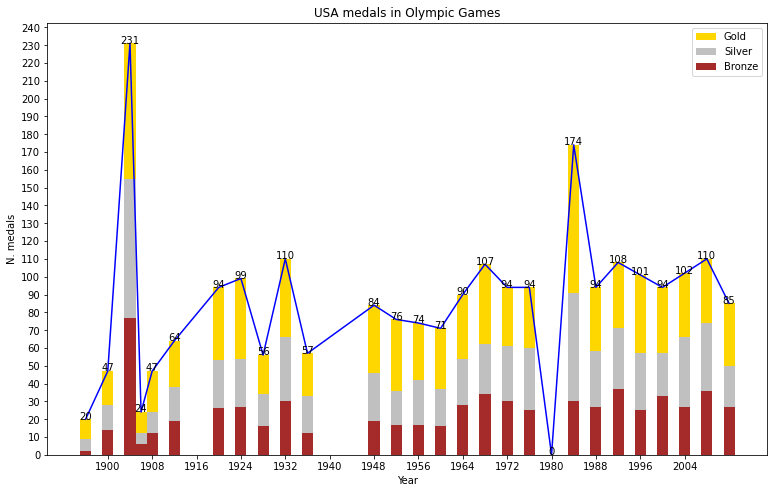

In [87]:
x=USA['Year']

fig = plt.figure(figsize=(10,6))
# add_axes([xmin,ymin,dx,dy])
ax = fig.add_axes([Xmin, Ymin, 1, 1])
ax.plot(x, USA['Total'], color='blue')
ax.bar(x, USA['Gold'], width, bottom=USA['Bronze']+USA['Silver'],color='gold', label='Gold')
ax.bar(x, USA['Silver'], width, bottom=USA['Bronze'],color='silver', label='Silver')
ax.bar(x, USA['Bronze'], width, color='brown', label='Bronze')
ax.set_xlabel('Year')
ax.set_ylabel('N. medals')
ax.set_title('USA medals in Olympic Games')
add_labels(x, USA['Total'])
ax.set_xticks(np.arange(Xmin+4,Xmax,8))
ax.set_yticks(np.arange(0,250,10))
ax.legend()
plt.show()

CHINA

In [111]:
China = pd.DataFrame(columns = ['Year','Gold','Silver','Bronze'])
China['Year'] = gold['Year']
China['Gold'] = gold['China']
China['Silver'] = silver['China']
China['Bronze'] = bronze['China']
China = China.astype(int)
China['Total'] = np.sum(China[['Gold','Silver','Bronze',]], axis=1)
China.head(15)

,Year,Gold,Silver,Bronze,Total
0,2012,34,24,21,79
1,2008,51,21,28,100
2,2004,32,17,14,63
3,2000,28,16,14,58
4,1996,16,22,12,50
5,1992,16,22,16,54
6,1988,5,11,12,28
7,1984,15,8,9,32
8,1980,0,0,0,0
9,1976,0,0,0,0


In [112]:
Xmin = np.min(China['Year'])
Xmax = np.max(China['Year'])
Ymin = np.min(China['Gold'])
dx = (np.max(China['Year']) - np.min(China['Year']))/len(China)
dy = 1
Ymax = np.max(China['Total'])
width=2
print(Ymax)

100


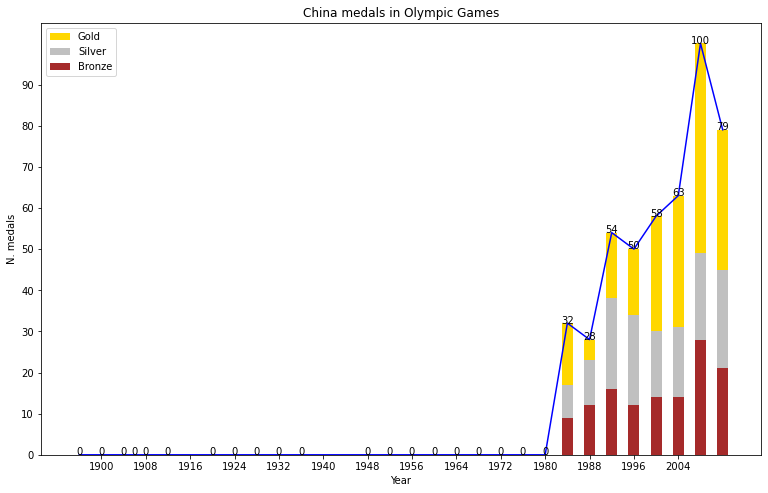

In [113]:
x=China['Year']

fig = plt.figure(figsize=(10,6))
# add_axes([xmin,ymin,dx,dy])
ax = fig.add_axes([Xmin, Ymin, 1, 1])
ax.plot(x, China['Total'], color='blue')
ax.bar(x, China['Gold'], width, bottom=China['Bronze']+China['Silver'],color='gold', label='Gold')
ax.bar(x, China['Silver'], width, bottom=China['Bronze'],color='silver', label='Silver')
ax.bar(x, China['Bronze'], width, color='brown', label='Bronze')
ax.set_xlabel('Year')
ax.set_ylabel('N. medals')
ax.set_title('China medals in Olympic Games')
add_labels(x, China['Total'])
ax.set_xticks(np.arange(Xmin+4,Xmax,8))
ax.set_yticks(np.arange(0,100,10))
ax.legend()
plt.show()